In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split , cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline


<Figure size 1152x648 with 0 Axes>

In [14]:
df = pd.read_csv(r'C:\Users\91998\Downloads\Space_Corrected.csv')

In [15]:
df.shape

(4324, 9)

In [16]:
df.sample()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
1094,1094,1094,IAI,"Pad 1, Palmachim Airbase, Israel","Tue May 28, 2002",Shavit-1 | Ofek-5,StatusRetired,NaN,Success


In [19]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [20]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

In [21]:
for i in df.columns:
    k = df[i].unique()
    if len(k)<25:
        print(f" data types of {i} is {df[i].dtypes} and  unique values are {df[i].unique()}  ") 
              
        print(" ")
    else:
        print(f"  data types of {i} is {df[i].dtypes} and no of unique values are {df[i].nunique()}")
        
        print(" ")

  data types of Company Name is object and no of unique values are 56
 
  data types of Location is object and no of unique values are 137
 
  data types of Datum is object and no of unique values are 4319
 
  data types of Detail is object and no of unique values are 4278
 
 data types of Status Rocket is object and  unique values are ['StatusActive' 'StatusRetired']  
 
  data types of  Rocket is object and no of unique values are 56
 
 data types of Status Mission is object and  unique values are ['Success' 'Failure' 'Prelaunch Failure' 'Partial Failure']  
 


In [22]:
df.duplicated().sum()

1

In [23]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [25]:
df.isnull().sum()/len(df)*100

Company Name       0.000000
Location           0.000000
Datum              0.000000
Detail             0.000000
Status Rocket      0.000000
 Rocket           77.705828
Status Mission     0.000000
dtype: float64

<AxesSubplot:>

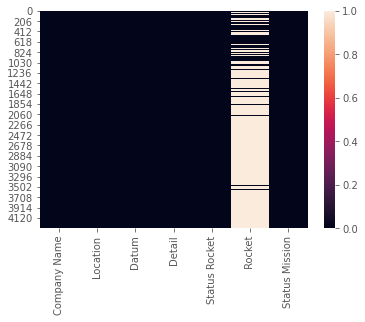

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.hist(figsize=(16,10));

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [28]:
plt.figure(figsize=(16,9))
for i in df.select_dtypes(exclude='object'):
    sns.displot(df[i],kde=True);

<Figure size 1152x648 with 0 Axes>

In [29]:
outliers_df = pd.DataFrame(columns=df.columns)

for col in df.select_dtypes(include=np.number):
    stat = df[col].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    
    outliers = df[(df[col] > upper) | (df[col] < lower)]

    if not outliers.empty:
        print(f'\nOutlier found in: {col}')
        outliers_df = pd.concat([outliers_df, outliers])
    else:
        print(f'\nNo outlier found in: {col}')

    print(f'\nSuspected Outliers Lower Bound: {lower}')
    print(f'Suspected Outliers Upper Bound: {upper}\n\n')

print(f'Total Number of outlier rows: {len(outliers_df)}')


Total Number of outlier rows: 0


In [30]:
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(16,5))
        sns.boxplot(data=df1, x=column)

In [31]:
df.corr()

""


In [32]:
df.sample()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
386,Northrop,"Stargazer, Cape Canaveral AFS, Florida, USA","Thu Dec 15, 2016 13:37 UTC",Pegasus XL | CYGNSS,StatusActive,40.0,Success


In [49]:
df['year']=df['Datum'].str.split(',').str.get(1).str.split(' ').str.get(1)

In [50]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957


In [51]:
df['year'].isnull().sum()

0

In [60]:
df['Month_name']=df['Datum'].str.split(',').str.get(0).str.split(' ').str.get(1)

In [61]:
df['day']=df['Datum'].str.split(',').str.get(0).str.split(' ').str.get(2)

In [62]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,year,Month_name,day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,Aug,07
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,Aug,06
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,Aug,04
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020,Jul,30
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,Jul,30
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958,Feb,05
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958,Feb,01
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957,Dec,06
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957,Nov,03


In [64]:
df['Status Mission'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status Mission, dtype: int64

In [67]:
df['Status Mission']=df['Status Mission'].str.replace('Partial Failure','Failure')
df['Status Mission']=df['Status Mission'].str.replace('Prelaunch Failure','Failure')

In [68]:
df['Status Mission'].value_counts()

Success    3879
Failure     445
Name: Status Mission, dtype: int64

In [69]:
df.sample()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,year,Month_name,day
1492,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Tue Aug 29, 1995 06:41 UTC",Ariane 42P | N-Star A,StatusRetired,NaN,Success,1995,Aug,29


In [78]:
df.drop(columns=['Month_name','Month_name','day','Location','Datum','Detail',' Rocket'],inplace=True)

In [77]:
df['Status Mission']=df['Status Mission'].map({'Success':1,'Failure':0})

In [79]:
df

,Company Name,Status Rocket,Status Mission,year
0,SpaceX,StatusActive,1,2020
1,CASC,StatusActive,1,2020
2,SpaceX,StatusActive,1,2020
3,Roscosmos,StatusActive,1,2020
4,ULA,StatusActive,1,2020
...,...,...,...,...
4319,US Navy,StatusRetired,0,1958
4320,AMBA,StatusRetired,1,1958
4321,US Navy,StatusRetired,0,1957
4322,RVSN USSR,StatusRetired,1,1957


In [88]:
num_feature = df.drop('Status Mission',axis=1).select_dtypes(exclude='object').columns
cat_feature = df.select_dtypes(include='object').columns

In [89]:
num_feature

Index([], dtype='object')

In [90]:
cat_feature

Index(['Company Name', 'Status Rocket', 'year'], dtype='object')

In [91]:
numeric_transformer = Pipeline(
     steps=[ ("imputer", SimpleImputer(strategy='median'))
               , ("scaler", StandardScaler())
           ]
 )
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [92]:
categorical_transformer = Pipeline(
     steps=[
         ("imputer_cat", SimpleImputer(strategy='most_frequent')),
        ("encoder", OneHotEncoder(sparse=False,handle_unknown='ignore')),
        ("scaler", StandardScaler())
               ]
)
categorical_transformer

Pipeline(steps=[('imputer_cat', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('scaler', StandardScaler())])

In [93]:
preprocessor = ColumnTransformer(
    transformers=[
         ("num", numeric_transformer, num_feature),
         ("cat", categorical_transformer, cat_feature),
     ]
 )
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index([], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Company Name', 'Status Rocket', 'year'], dtype='object'))])

In [94]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
            ("model", RandomForestClassifier()
           
           )
          ]
 )


In [96]:
X=df.drop(columns=['Status Mission'])

In [97]:
X

,Company Name,Status Rocket,year
0,SpaceX,StatusActive,2020
1,CASC,StatusActive,2020
2,SpaceX,StatusActive,2020
3,Roscosmos,StatusActive,2020
4,ULA,StatusActive,2020
...,...,...,...
4319,US Navy,StatusRetired,1958
4320,AMBA,StatusRetired,1958
4321,US Navy,StatusRetired,1957
4322,RVSN USSR,StatusRetired,1957


In [98]:
y=df['Status Mission']

In [99]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.24294115131297578

In [100]:
kf=KFold()

In [101]:
scores = []
i = 1
for train_set, test_set in kf.split(X):
    pipe.fit(X.loc[train_set], y[train_set])
    sco = pipe.score(X.loc[test_set], y[test_set])
    scores.append(sco)
    print("iteration ", i)
    i += 1

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5


In [102]:
scores

[0.8277456647398844,
 0.9132947976878613,
 0.9329479768786128,
 0.9260115606936417,
 0.7662037037037037]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                       

In [105]:
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9017341040462428

In [106]:
accuracy_score(y_train,y_train_pred)

0.9254119687771032